In [311]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [312]:
df_nfci = pd.read_csv("/home/sscf/macro_analytics/nfci_correlations/nfci_weekly.csv")
df_nfci["Date"] = pd.to_datetime(df_nfci["Friday_of_Week"])
df_nfci = df_nfci.drop(labels = ["Friday_of_Week", "ANFCI", "Risk", "Credit", "Leverage", "Nonfinancial_Leverage"], axis = "columns")
df_nfci.set_index("Date", inplace = True)

df_nfci

,NFCI
Date,
1971-01-08,0.561713
1971-01-15,0.610193
1971-01-22,0.669149
1971-01-29,0.733014
1971-02-05,0.797482
...,...
2022-11-04,-0.120065
2022-11-11,-0.157315
2022-11-18,-0.186452


In [313]:
df_btc = pd.read_csv("/home/sscf/macro_analytics/nfci_correlations/btc_daily.csv")
df_btc["Date"] = pd.to_datetime(df_btc["Date"])
df_btc["btc_price"] = df_btc["Price"]
df_btc = df_btc.drop(labels = ["Open", "High", "Low", "Vol.", "Price", "Change %"], axis = "columns")
df_btc.set_index("Date", inplace = True)

df_btc

,btc_price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2022-12-10,"17,127.2"
2022-12-11,"17,093.3"
2022-12-12,"17,210.4"


In [314]:
df = df_nfci.join(df_btc, on = "Date")
df = df[2068:]

df['btc_price'] = df['btc_price'].apply(lambda x: float(x.split()[0].replace(',', '')))
df["btc_price"] = df["btc_price"].astype(float)
df["NFCI"] = df["NFCI"].astype(float)

df["NFCI_diff"] = df["NFCI"].diff()
df["NFCI_diff_percent"] = (df["NFCI_diff"] / df["NFCI"].shift(periods = 1))

df["btc_diff"] = df["btc_price"].diff()
df["btc_diff_percent"] = (df["btc_diff"] / df["btc_price"].shift(periods = 1))

df = df.dropna()

df

,NFCI,btc_price,NFCI_diff,NFCI_diff_percent,btc_diff,btc_diff_percent
Date,,,,,,
2010-09-03,-0.239802,0.1,-0.002466,0.010392,0.0,0.000000
2010-09-10,-0.253037,0.1,-0.013236,0.055194,0.0,0.000000
2010-09-17,-0.274572,0.1,-0.021534,0.085103,0.0,0.000000
2010-09-24,-0.301570,0.1,-0.026998,0.098327,0.0,0.000000
2010-10-01,-0.332171,0.1,-0.030602,0.101474,0.0,0.000000
...,...,...,...,...,...,...
2022-11-04,-0.120065,21145.9,-0.037496,0.454107,551.5,0.026779
2022-11-11,-0.157315,17049.9,-0.037250,0.310246,-4096.0,-0.193702
2022-11-18,-0.186452,16638.3,-0.029137,0.185215,-411.6,-0.024141


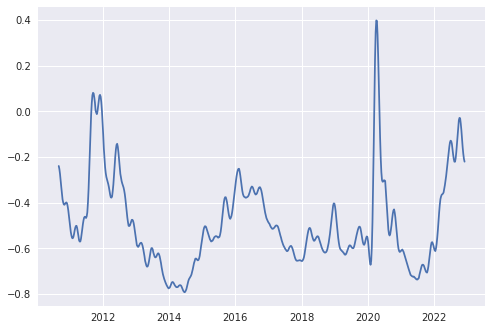

In [315]:
plt.plot(df["NFCI"])

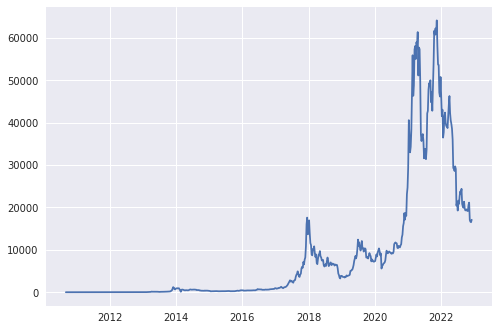

In [316]:
plt.plot(df["btc_price"])

(-0.5, 0.5)

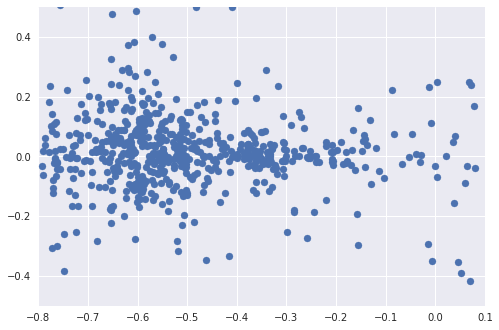

In [317]:
plt.scatter(df["NFCI"], df["btc_diff_percent"])
plt.xlim(-0.8, 0.1)
plt.ylim(-0.5, 0.5)

In [318]:
pearsonr = st.pearsonr(df["NFCI"], df["btc_diff_percent"])

(-0.07950948798305102, 0.04435709471522814)

In [ ]:
plt.scatter(df["NFCI"], df["btc_diff_percent"])
plt.plot(df["NFCI"], )
plt.xlim(-0.8, 0.1)
plt.ylim(-0.5, 0.5)